In [63]:
import hyperspy.api as hs
import numpy as np
import matplotlib as plt
import scipy
import py4DSTEM as py

In [64]:
#Load the suppurted format automatically
signal = hs.load("example_EM_Image.tif")

#inspect the signal
print(signal)
print(f"Shape: {signal.axes_manager}")

#Load specific file from a large dataset
s_4d = hs.load('example_EM_Image.tif', lazy=True)

<Signal2D, title: , dimensions: (|503, 503)>
Shape: <Axes manager, axes: (|503, 503)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
           width |    503 |      0 |      -0 |       1 | <undefined> 
          height |    503 |      0 |      -0 |       1 | <undefined> 


In [65]:
## Basic Plotting

The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.
The module `rsciio.utils.rgb_tools` has been renamed to `rsciio.utils.rgb` and it will be removed in version 1.0.


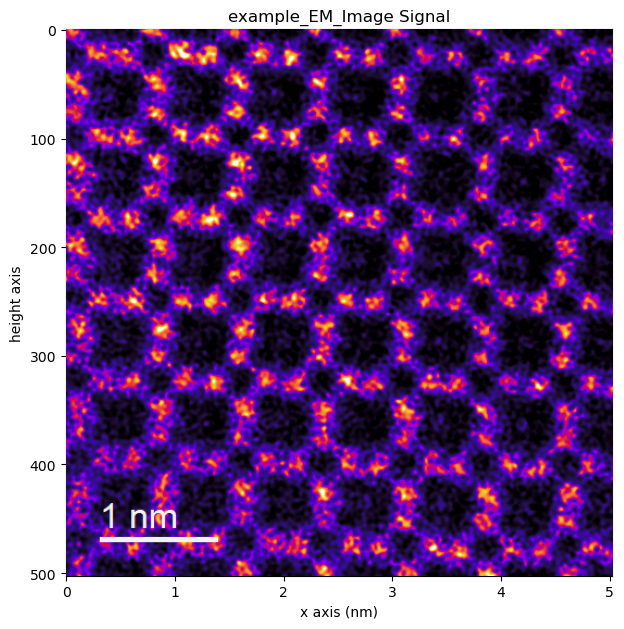

In [66]:
import hyperspy.api as hs

# set scale, name, units
signal.axes_manager[0].scale = 0.01
signal.axes_manager[0].name = 'x'
signal.axes_manager[0].units = 'nm'


signal.plot()
signal.plot(colorbar=True)


In [67]:
#compute mean intensity and standard deviation
stack = hs.load("example_EM_Image.tif")
data = stack.data

if data.dtype.names is not None: 
    rgb_array = np.stack([data[name] for name in data.dtype.names], axis=-1)
    data = rgb_array.mean(axis=-1) 

elif data.ndim == 3 and data.shape[-1] == 3:
    data = data.mean(axis=-1)

if data.ndim == 2: 
    data = data[np.newaxis, :, :]

means = []
stds = []
for i, frame in enumerate(data):
    frame_mean = frame.mean()
    frame_std = frame.std()
    means.append(frame_mean)
    stds.append(frame_std)
    print(f" mean = {frame_mean:.2f}, std = {frame_std:.2f}")

 mean = 59.01, std = 42.33


Text(0, 0.5, 'Count')

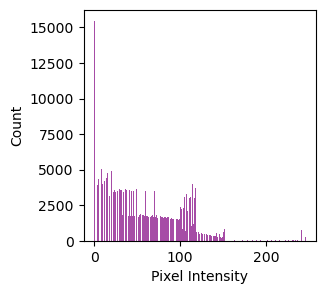

In [76]:
# plot histogram 
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt

signal = hs.load("example_EM_Image.tif")
data = signal.data

signal.axes_manager[0].scale = 0.01
signal.axes_manager[0].name = 'x'
signal.axes_manager[0].units = 'nm'

if data.dtype.names is not None: 
    data = np.stack([data[name] for name in data.dtype.names], axis=-1).mean(axis=-1)
                    
elif data.ndim == 3 and data.shape[-1] == 3:
    data = data.mean(axis=-1)

pixels = data.flatten()

plt.figure(figsize=(3,3))
plt.hist(pixels, bins=256, color='purple', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")

In [62]:
# Description of what is being observed in histogram above.